In [1]:
import json
import pandas as pd

In [2]:
# load jsonl into json
jsonl_path = "../Data/Temp/VA.jsonl"
json_path = "../Data/VA/VA.json"

with open(jsonl_path, 'r') as jsonl_file, open(json_path, 'w') as json_file:
    json_list = [json.loads(line) for line in jsonl_file]
    df = pd.DataFrame(json_list)
    to_remove = ["13332696-my-friend-dahmer", "17346698-march", "22487952-march", "29436571-march"]
    df = df[~df['id'].isin(to_remove)].reset_index(drop=True)
    df = df.to_dict(orient='records')
    json.dump(df, json_file, indent=4)

In [3]:
df = pd.DataFrame(df)
df["valence"] = df["valence"].apply(lambda x: round(float(x), 2))
df["arousal"] = df["arousal"].apply(lambda x: round(float(x), 2))
df.head()

,index,id,text,likes,shelves,word_count,valence,arousal
0,0,61047526-tangier-in-the-rain,"A strange one, this. A wholly speculative stor...",14,"[arc-arc-arc, arty-farty, bandes-dessinees]",27,0.55,0.46
1,1,61047526-tangier-in-the-rain,"As it is stated in the foreword, the author an...",5,[çizgi-roman-manga-vb],188,0.52,0.49
2,2,61047526-tangier-in-the-rain,Didn't want to DNF this short graphic novel bu...,5,[],22,0.48,0.45
3,3,61047526-tangier-in-the-rain,Not bad but nothing special. I didnt particula...,5,[],31,0.47,0.29
4,4,61047526-tangier-in-the-rain,"This was quite lovely to look at, but in terms...",4,"[arc, graphic-novels, historical-fiction]",200,0.50,0.49


In [4]:
print(f"Total number of reviews: {len(df)}")
print(f"Total number of books: {len(df['id'].unique())}")
print(f"Total review word count: {df['word_count'].sum()}")

Total number of reviews: 17967
Total number of books: 217
Total review word count: 1698190


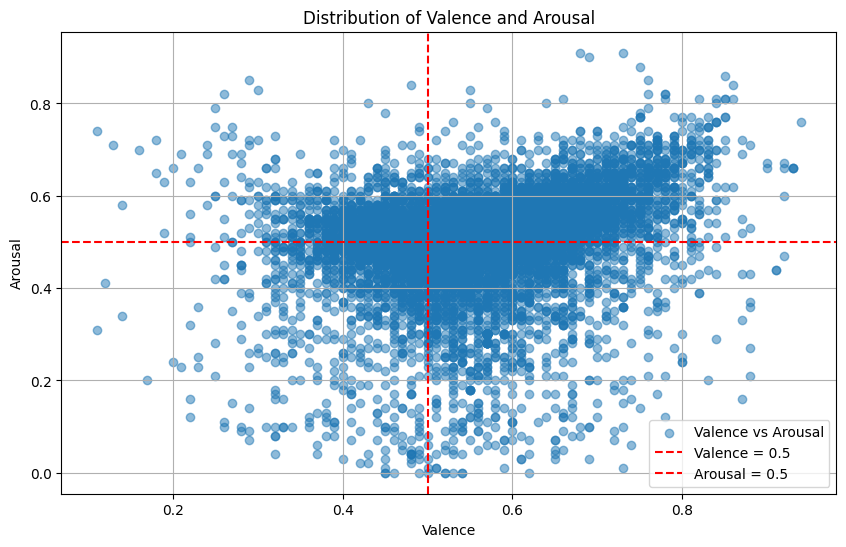

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['valence'], df['arousal'], alpha=0.5, label='Valence vs Arousal')
plt.axvline(x=0.5, color='red', linestyle='--', label='Valence = 0.5')
plt.axhline(y=0.5, color='red', linestyle='--', label='Arousal = 0.5')
plt.title('Distribution of Valence and Arousal')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
df_sort = df.copy()
df_sort = df_sort.sort_values(by=['arousal'], ascending=False)
df_sort.head()

,index,id,text,likes,shelves,word_count,valence,arousal
3557,8517,55554047-billie-holiday,EXCELLENT!!! BUY THIS BOOK!!!,0,[],4,0.68,0.91
7486,15523,57693671-putin-s-russia,BRILLIANT!!!! A MUST READ! Avery clever mix of...,0,[],11,0.73,0.91
16457,30929,61337907-the-twilight-man,An absolute must read for any fan of the Twili...,2,[],11,0.69,0.90
13752,28224,34734476-monet,this book was SO PRETTY!!!,0,"[2018, graphic-novels-comics, memoirs-biograph...",5,0.75,0.88
8602,16639,34227681-nick-cave,BRILLIANTLY ENTHRALLING,0,[],2,0.85,0.86


In [12]:
df_sort = df_sort.sort_values(by=['valence'], ascending=False)
df_sort.head()

,index,id,text,likes,shelves,word_count,valence,arousal
4234,9194,60784723-we-are-on-our-own,amazing beautiful,0,[],2,0.94,0.76
14380,28852,61363154-ms-davis,beautiful,0,[24-s],1,0.93,0.66
1361,1361,22312041-vincent,beautiful,0,[2023],1,0.93,0.66
2589,2589,31944933-audubon-on-the-wings-of-the-world,beautiful,0,[],1,0.93,0.66
1168,1168,15792872-feynman,Very enjoyable,0,"[biography, science]",2,0.92,0.67


In [5]:
df_pos_v = df[df['valence'] >= 0.6]
df_pos_a = df[df['arousal'] >= 0.55]
df_neg_v = df[df['valence'] <= 0.5]
df_neg_a = df[df['arousal'] <= 0.49]

print(f"Positive Valence: {len(df_pos_v)} samples; Wrod count: {df_pos_v['word_count'].sum()}; Books: {len(df_pos_v['id'].unique())}")
print(f"Positive Arousal: {len(df_pos_a)} samples; Wrod count: {df_pos_a['word_count'].sum()}; Books: {len(df_pos_a['id'].unique())}")
print(f"Negative Valence: {len(df_neg_v)} samples; Wrod count: {df_neg_v['word_count'].sum()}; Books: {len(df_neg_v['id'].unique())}")
print(f"Negative Arousal: {len(df_neg_a)} samples; Wrod count: {df_neg_a['word_count'].sum()}; Books: {len(df_neg_a['id'].unique())}")

Positive Valence: 5099 samples; Wrod count: 223999; Books: 204
Positive Arousal: 4754 samples; Wrod count: 294252; Books: 203
Negative Valence: 4851 samples; Wrod count: 601250; Books: 205
Negative Arousal: 5249 samples; Wrod count: 384176; Books: 210


In [15]:
# Books without high/low valence reviews

books = df['id'].unique()
books_pos_v = df_pos_v['id'].unique()
books_neg_v = df_neg_v['id'].unique()

books_no_pos_v = [book for book in books if book not in books_pos_v]
books_no_neg_v = [book for book in books if book not in books_neg_v]

print(books_no_pos_v)
print(books_no_neg_v)

print("Books without positive valence reviews:")
for book in books_no_pos_v:
    print(f"{book}\t{len(df[df['id']==book])} reviews")

print("Books without negative valence reviews:")
for book in books_no_neg_v:
    print(f"{book}\t{len(df[df['id']==book])} reviews")

['40554540-goya', '30341584-john-stanley', '20609980-kurt-cobain', '60317104-francis-bacon-graphic-novel', '58326588-freddie-mercury', '59961494-mark-rothko', '61363164-evita', '43811247-renoir', '41087271-sunday-s-child', '60500409-fists-raised', '57716146-a-revolution-in-three-acts', '63065575-george-s-run', '53022293-topp']
['45708322-michael-jackson-m-sica-de-luz-vida-de-sombras-michael-jackson-music', '196019251-betrayal-of-the-mind', '50802077-regards-ditko', '199451852-delights', '43613453-darwin', '35297626-the-beatles-story', '38458481-memorabilia', '125877100-erdo-an', '8721708-genius-isolated', '43811247-renoir', '60459331-beethoven', '53022293-topp']
Books without positive valence reviews:
40554540-goya	7 reviews
30341584-john-stanley	2 reviews
20609980-kurt-cobain	5 reviews
60317104-francis-bacon-graphic-novel	4 reviews
58326588-freddie-mercury	2 reviews
59961494-mark-rothko	3 reviews
61363164-evita	6 reviews
43811247-renoir	6 reviews
41087271-sunday-s-child	7 reviews
6050

In [8]:
pos_v_txt = "../Data/VA/review_txts_pos_v.txt"
neg_v_txt = "../Data/VA/review_txts_neg_v.txt"

with open(pos_v_txt, 'w') as pos_file:
    for review in df_pos_v['text']:
        pos_file.write(str(review) + "\n")

with open(neg_v_txt, 'w') as neg_file:
    for review in df_neg_v['text']:
        neg_file.write(str(review) + "\n")

In [9]:
pos_v_json = "../Data/VA/review_jsons_pos_v.json"
neg_v_json = "../Data/VA/review_jsons_neg_v.json"

dict_pos_v = df_pos_v.to_dict(orient='records')
dict_neg_v = df_neg_v.to_dict(orient='records')

with open(pos_v_json, 'w') as pos_file:
    json.dump(dict_pos_v, pos_file, indent=4)
with open(neg_v_json, 'w') as neg_file:
    json.dump(dict_neg_v, neg_file, indent=4)

In [6]:
pos_a_json = "../Data/VA/review_jsons_pos_a.json"
neg_a_json = "../Data/VA/review_jsons_neg_a.json"
pos_a_txt = "../Data/VA/review_txts_pos_a.txt"
neg_a_txt = "../Data/VA/review_txts_neg_a.txt"

with open(pos_a_txt, 'w') as pos_file:
    for review in df_pos_a['text']:
        pos_file.write(str(review) + "\n")

with open(neg_a_txt, 'w') as neg_file:
    for review in df_neg_a['text']:
        neg_file.write(str(review) + "\n")

dict_pos_a = df_pos_a.to_dict(orient='records')
dict_neg_a = df_neg_a.to_dict(orient='records')

with open(pos_a_json, 'w') as pos_file:
    json.dump(dict_pos_a, pos_file, indent=4)
with open(neg_a_json, 'w') as neg_file:
    json.dump(dict_neg_a, neg_file, indent=4)

In [10]:
# word number count
def word_count(text):
    return len(text.split())

df_pos_v.loc[:, 'word_count'] = df_pos_v['text'].apply(word_count)
df_neg_v.loc[:, 'word_count'] = df_neg_v['text'].apply(word_count)

print(f"Total words in positive valence reviews: {df_pos_v['word_count'].sum()}")
print(f"Total words in negative valence reviews: {df_neg_v['word_count'].sum()}")

Total words in positive valence reviews: 223583
Total words in negative valence reviews: 600107


In [11]:
print(df["valence"].describe().round(2))
print(df["arousal"].describe().round(2))

count    17967.00
mean         0.55
std          0.09
min          0.11
25%          0.50
50%          0.55
75%          0.60
max          0.94
Name: valence, dtype: float64
count    17967.00
mean         0.51
std          0.08
min          0.00
25%          0.49
50%          0.52
75%          0.55
max          0.91
Name: arousal, dtype: float64


In [11]:
# word embedding on pos_v
import gensim
from gensim.models import Word2Vec
import re
import string

def clean_text(text):

    # split and lower case
    tokens = text.split()
    tokens = [t.lower() for t in tokens]

    # remove punctuation
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', token) for token in tokens]

    # remove numbers
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

# create model
def create_model(corpus, model_path):
    # create Word2Vec model
    model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, workers=4)
    # save model
    model.save(model_path)
    return model

def create_model_from_df(df, model_path):
    # clean text
    corpus = df['text'].apply(clean_text).tolist()
    # create model
    model = create_model(corpus, model_path)
    return model

In [12]:
model_posv_path = "../Data/VA/word2vec_pos_v.model"
model_negv_path = "../Data/VA/word2vec_neg_v.model"
model_posa_path = "../Data/VA/word2vec_pos_a.model"
model_nega_path = "../Data/VA/word2vec_neg_a.model"

model_pos_v = create_model_from_df(df_pos_v, model_posv_path)
model_neg_v = create_model_from_df(df_neg_v, model_negv_path)
model_pos_a = create_model_from_df(df_pos_a, model_posa_path)
model_neg_a = create_model_from_df(df_neg_a, model_nega_path)

In [13]:
# most similar df
prd_wdls = [["graphic", "biography"]]

def predict_words(model, prd_wdls):
    results = []
    columns = ["word"] + [f"pred_{i}" for i in range(1, 6)]

    for pair in prd_wdls:
        try:
            pred_words = model.predict_output_word(pair, topn=5)
            row = [pair] + [f"{w}:{round(float(pred), 2)}" for w, pred in pred_words]
            results.append(row)
        except KeyError:
            continue
    
    pridict_df = pd.DataFrame(results, columns=columns)
    return pridict_df

In [14]:
wdls = ["comics", "graphic", "biography", "amazing", "beautiful", "sad", "boring"]

def similar_words(model, wdls):
    results = []
    columns = ["word"] + [f"similar_{i}" for i in range(1, 11)]

    for word in wdls:
        try:
            similar_words = model.wv.most_similar(word, topn=10)
            row = [word] + [f"{w}:{round(sim, 2)}" for w, sim in similar_words]
            results.append(row)
        except KeyError:
            continue
    
    simlar_df = pd.DataFrame(results, columns=columns)
    return simlar_df

models = [model_pos_v, model_neg_v, model_pos_a, model_neg_a]
model_names = ['model_pos_v', 'model_neg_v', 'model_pos_a', 'model_neg_a']

similar_dfs = []
for model in models:
    similar_df = similar_words(model, wdls)
    similar_dfs.append(similar_df)

for model_name, similar_df in zip(model_names, similar_dfs):
    similar_df.insert(0, 'model', model_name)

final_similar_df = pd.concat(similar_dfs, ignore_index=True)
final_similar_df = final_similar_df.sort_values(by='word').reset_index(drop=True)
final_similar_df.head(100)

,model,word,similar_1,similar_2,similar_3,similar_4,similar_5,similar_6,similar_7,similar_8,similar_9,similar_10
0,model_pos_v,amazing,fantastic:0.98,wonderful:0.97,simple:0.97,stunning:0.97,lovely:0.97,gorgeous:0.96,beautiful:0.96,absolutely:0.95,incredible:0.95,told:0.95
1,model_neg_a,amazing,cute:0.99,super:0.98,fine:0.98,compelling:0.98,ok:0.98,itself:0.97,fantastic:0.97,absolutely:0.97,gorgeous:0.97,illustration:0.97
2,model_neg_v,amazing,horrifying:0.96,heartbreaking:0.95,informational:0.95,sweet:0.95,paced:0.95,ultimately:0.95,ed:0.95,deeply:0.95,thoroughly:0.95,breathtaking:0.94
3,model_pos_a,amazing,wonderful:0.96,fantastic:0.96,stunning:0.96,beautiful:0.96,gorgeous:0.96,incredible:0.95,lovely:0.95,absolutely:0.95,engaging:0.95,excellent:0.95
4,model_neg_a,beautiful,simple:0.96,style:0.95,writing:0.94,artwork:0.93,storytelling:0.93,drawing:0.92,gorgeous:0.92,illustration:0.91,great:0.91,lovely:0.9
5,model_pos_v,beautiful,gorgeous:0.97,artwork:0.96,amazing:0.96,simple:0.95,beautifully:0.95,told:0.95,stunning:0.95,wonderful:0.94,style:0.93,fantastic:0.93
6,model_pos_a,beautiful,amazing:0.96,gorgeous:0.96,style:0.96,wonderful:0.96,artwork:0.95,fantastic:0.95,illustrated:0.94,beautifully:0.94,stunning:0.94,absolutely:0.94
7,model_neg_v,beautiful,simple:0.94,storytelling:0.92,great:0.9,fine:0.9,particularly:0.9,gorgeous:0.89,disjointed:0.89,writing:0.89,ok:0.89,style:0.89
8,model_pos_v,biography,form:0.94,format:0.93,nonfiction:0.9,excellent:0.9,objective:0.87,novel:0.87,comic:0.86,trinity:0.86,best:0.85,memoir:0.85
9,model_neg_a,biography,format:0.9,memoir:0.88,novel:0.86,form:0.85,storyteller:0.84,novelization:0.83,nonfiction:0.82,written:0.81,suited:0.8,stumbled:0.8
